In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import joblib
import seaborn as sns

#scoring and tuning 
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/car data.csv')

In [ ]:
df.shape

(301, 9)

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [ ]:
df.isna().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

Ok No single null value

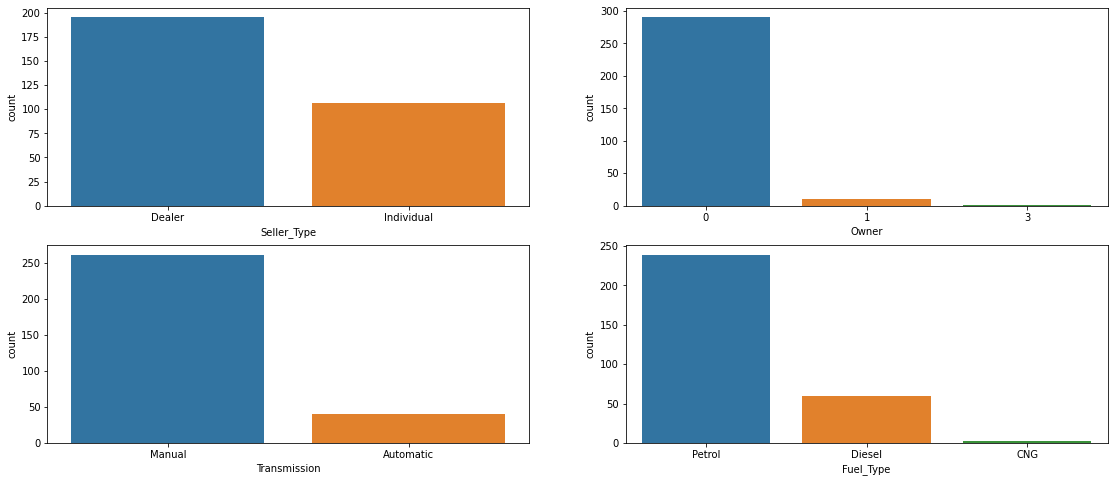

In [ ]:
f, axes = plt.subplots(2,2, figsize=(19,8))
sns.countplot(x='Transmission',data=df, ax=axes[1,0])
sns.countplot(x='Fuel_Type',data=df,ax=axes[1,1])
sns.countplot(x='Owner',data=df,ax=axes[0,1])
sns.countplot(x='Seller_Type',data=df,ax=axes[0,0])

Values of car which has previous owner of 3 or car with CNG fuel type is extremly low

when making prediction with these type of cars, prediction more likely to vary

In [ ]:
# Creating Total Price Differece feature which tells total differance made between Showroom Price and Selling Price
df['Price_Diff']=df['Present_Price']-df['Selling_Price']

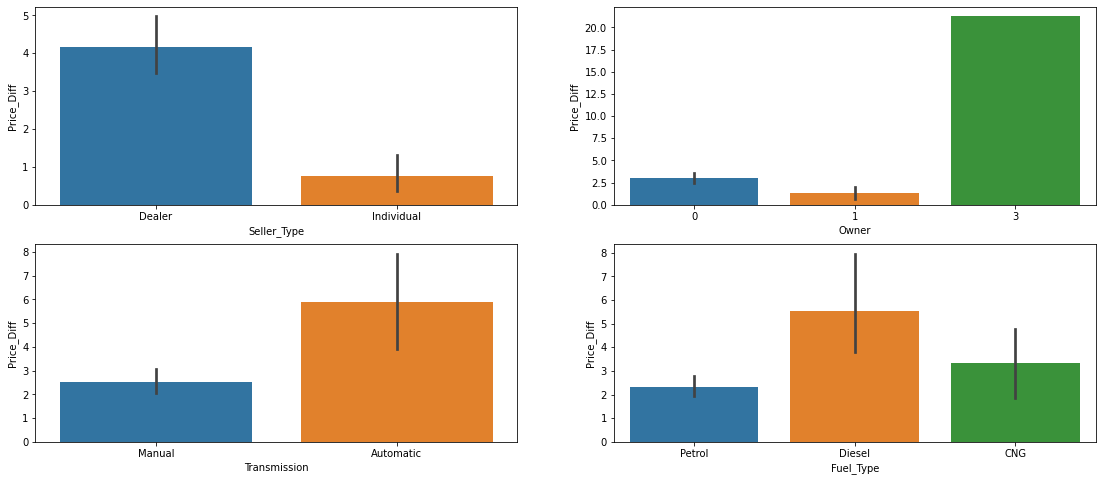

In [ ]:
f, axes = plt.subplots(2,2, figsize=(19,8))
sns.barplot(x='Transmission',y='Price_Diff',data=df,ax=axes[1,0])
sns.barplot(x='Fuel_Type',y='Price_Diff',data=df,ax=axes[1,1])
sns.barplot(x='Owner',y='Price_Diff',data=df,ax=axes[0,1])
sns.barplot(x='Seller_Type',y='Price_Diff',data=df,ax=axes[0,0])

In [ ]:
#All out categorical data has some sort of pattern regarding car's present price and selling price

In [ ]:
df['Year']=2019-df['Year']

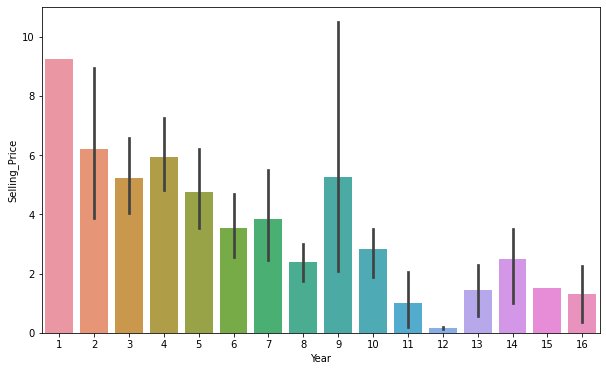

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Year',y='Selling_Price',data=df)

Car Usage in Years and its selling price has negative correlation
Its obvious that as many year car get used value decreses

Present Price and Selling Price are positively correlated
from the scatter diagram it's also clear that Selling Price isn't decreasing gradually. Except one case

In [ ]:
px.scatter(x='Price_Diff',y='Kms_Driven',data_frame=df)

In [ ]:
df[df['Kms_Driven']==78000]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Price_Diff
62,fortuner,5,18.75,35.96,78000,Diesel,Dealer,Automatic,0,17.21
86,land cruiser,9,35.00,92.60,78000,Diesel,Dealer,Manual,0,57.60


In [ ]:

df[df['Kms_Driven']==500000]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Price_Diff
196,Activa 3g,11,0.17,0.52,500000,Petrol,Individual,Automatic,0,0.35


In [ ]:
df.drop([86,196],axis=0,inplace=True)

In [ ]:
px.scatter(x='Price_Diff',y='Kms_Driven',data_frame=df)

Now it looks good

In [ ]:
fuel_dummies =pd.get_dummies(df[['Fuel_Type','Transmission','Seller_Type']], drop_first=True)

In [ ]:
df  = pd.concat([df,fuel_dummies],axis = 1)

In [ ]:
df.drop(['Car_Name','Fuel_Type','Transmission','Seller_Type','Price_Diff'],axis=1,inplace=True)

In [ ]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual
0,5,3.35,5.59,27000,0,0,1,1,0
1,6,4.75,9.54,43000,0,1,0,1,0
2,2,7.25,9.85,6900,0,0,1,1,0
3,8,2.85,4.15,5200,0,0,1,1,0
4,5,4.60,6.87,42450,0,1,0,1,0


In [ ]:
#Hard work done! Now it's time to train our model

In [ ]:
cv=5
r2=[]
cv_score=[]
mae=[]
mse=[]

In [ ]:
X=df.drop('Selling_Price',axis=1)

In [ ]:
y=df['Selling_Price'] 

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=66)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((224, 8), (224,), (75, 8), (75,))

In [ ]:
def results(model,X_train,X_test,y_train,y_test): 
    model.fit(X_train,y_train)
    predicts=model.predict(X_test)
    prediction=pd.DataFrame(predicts)
    R_2=r2_score(y_test,model.predict(X_test))
    mean_sqare_E =mean_squared_error(y_test,model.predict(X_test))
    mean_abso_E =mean_absolute_error(y_test,model.predict(X_test))
    cv_mean = -cross_val_score(model,X_train,y_train,cv=cv, scoring='neg_mean_squared_error').mean()
    
    # Appending results to Lists 
    r2.append(r2_score(y_test,model.predict(X_test)))
    cv_score.append(-cross_val_score(model,X,y,cv=cv, scoring='neg_mean_squared_error').mean())
    mse.append(mean_squared_error(y_test,predicts))
    mae.append(mean_absolute_error(y_test,predicts))
    
    # Printing results  
    print(model,"\n") 
    print("r^2 value :",R_2,"\n")
    print('mean square error',mean_sqare_E,"\n")
    print('mean absolute error',mean_abso_E,"\n")
    print("CV score:",cv_mean,"\n")
    print('#'*40)
    # Plot for prediction vs originals
    plt.style.use('ggplot')
    test_index=y_test.reset_index()["Selling_Price"]
    ax=test_index.plot(label="originals",figsize=(16,8),linewidth=2,color="r",marker='o')
    ax=prediction[0].plot(label = "predictions",figsize=(16,8),linewidth=2,color="b",marker='*')
    plt.legend(loc='upper right')
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
    plt.show()

Classis Linear Regression

In [ ]:
lg = LinearRegression()

LinearRegression() 

r^2 value : 0.873933974441826 

mean square error 2.8781985346776793 

mean absolute error 1.0235745504573075 

CV score: 3.1696789201157536 

########################################


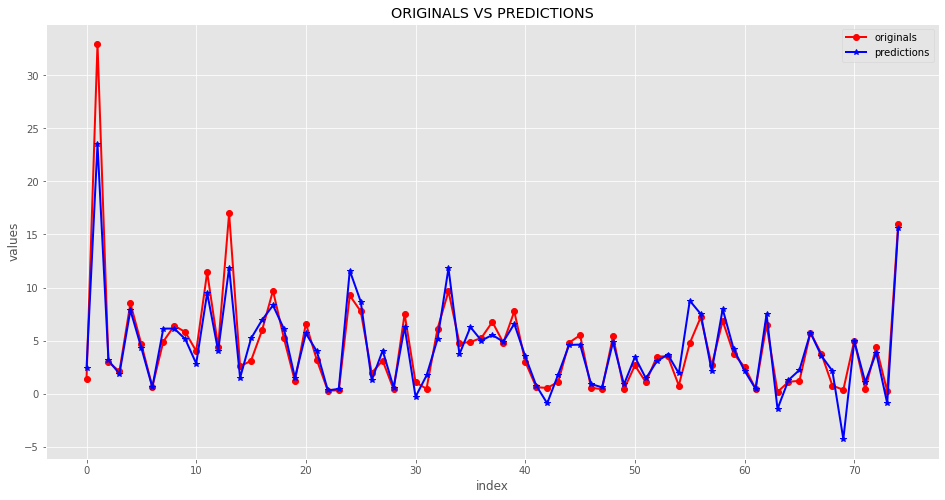

In [ ]:
results(lg,X_train,X_test,y_train,y_test)

Our Favourite Random Forest

In [ ]:
rfr = RandomForestRegressor()

RandomForestRegressor() 

r^2 value : 0.9039011612492703 

mean square error 2.1940212333333333 

mean absolute error 0.6332693333333339 

CV score: 1.2247263992878792 

########################################


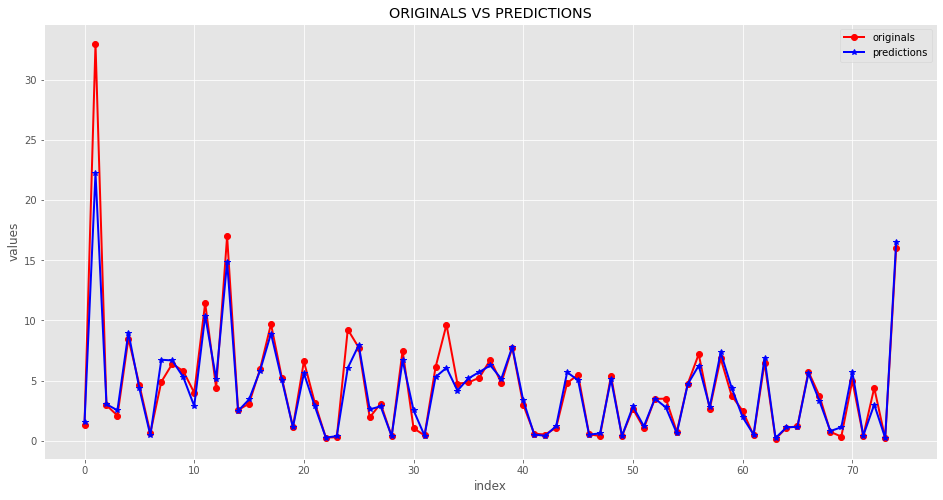

In [ ]:
results(rfr,X_train,X_test,y_train,y_test)

Then we have Decision Tree Regressor

In [ ]:
dtr =DecisionTreeRegressor()

DecisionTreeRegressor() 

r^2 value : 0.8652638407183102 

mean square error 3.0761453333333333 

mean absolute error 0.9174666666666667 

CV score: 1.8523840808080814 

########################################


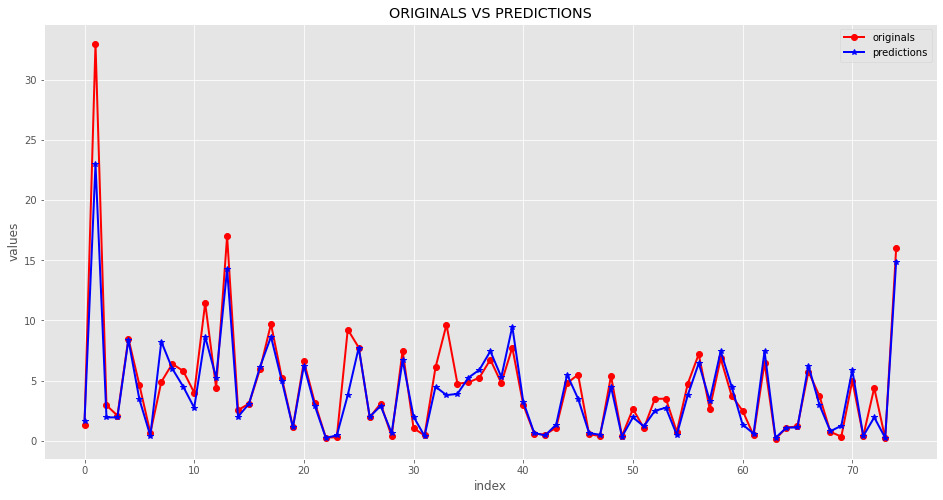

In [ ]:

results(dtr,X_train,X_test,y_train,y_test)

Hyper Tuned Ridge

In [ ]:
params = {"alpha": [.01, .1, .5, .7, 1, 1.5, 2, 2.5, 3, 5, 8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,30]}
ridreg = Ridge()
clf = GridSearchCV(estimator=ridreg, param_grid=params, cv=5, return_train_score=True)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 0.7, 1, 1.5, 2, 2.5, 3, 5, 8,
                                   9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20,
                                   21, 22, 23, 24, 25, 26, 27, 30]},
             return_train_score=True)

In [ ]:
clf.best_params_

{'alpha': 23}

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 0.7, 1, 1.5, 2, 2.5, 3, 5, 8,
                                   9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20,
                                   21, 22, 23, 24, 25, 26, 27, 30]},
             return_train_score=True) 

r^2 value : 0.8807159455442726 

mean square error 2.723360153735142 

mean absolute error 0.9755908201128483 

CV score: 3.0131421080899914 

########################################


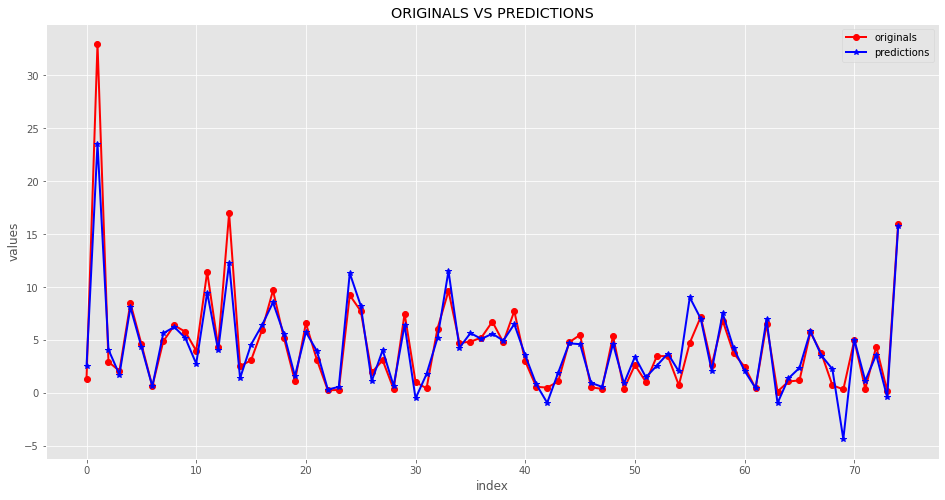

In [ ]:
results(clf,X_train,X_test,y_train,y_test)

Hyper Tuned Lasso

In [ ]:
params = {"alpha": [.00001, .0001, .001, .005, .01, .1, 1, 5]}
lasreg = Lasso()
clf = GridSearchCV(estimator=lasreg, param_grid=params, cv=5, return_train_score=True)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.005, 0.01, 0.1, 1,
                                   5]},
             return_train_score=True)

In [ ]:
clf.best_params_

{'alpha': 0.1}

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.005, 0.01, 0.1, 1,
                                   5]},
             return_train_score=True) 

r^2 value : 0.8824197682430146 

mean square error 2.6844603790087076 

mean absolute error 0.9823700461611429 

CV score: 2.9198558777702983 

########################################


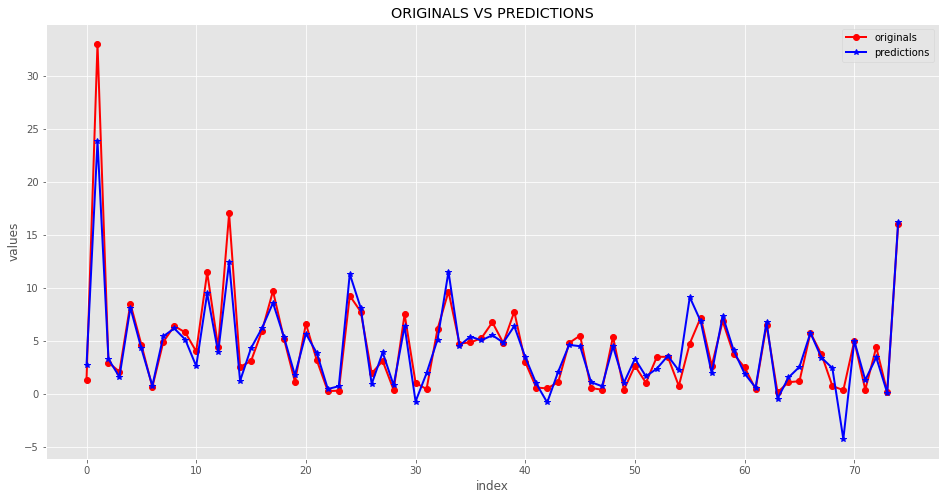

In [ ]:
results(clf,X_train,X_test,y_train,y_test)

Compering ALL Results

In [ ]:
Results = pd.DataFrame({
    'model':['linear','random Forest','Dicision Tree','Ridge','Lasso'],
    'r^2':r2,
    'cv_score':cv_score,
    'mae':mae,
    'mse':mse
})

In [ ]:
Results

,model,r^2,cv_score,mae,mse
0,linear,0.873934,3.747733,1.023575,2.878199
1,random Forest,0.903901,2.720486,0.633269,2.194021
2,Dicision Tree,0.865264,4.072717,0.917467,3.076145
3,Ridge,0.880716,3.610160,0.975591,2.723360
4,Lasso,0.882420,3.957253,0.982370,2.684460
